In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
# Read Dataset

elections = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [3]:
#shape of the dataset

elections.shape

(1525, 10)

In [4]:
elections.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
elections.set_index('Unnamed: 0',inplace=True)

In [6]:
elections.shape

(1525, 9)

In [7]:
print("No. of Rows :" + str(elections.shape[0]))
print("No. of Columns :" + str(elections.shape[1]))

No. of Rows :1525
No. of Columns :9


In [8]:
elections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [9]:
#To check if all variables categorized as numeric are acually numeric or categorical

num = []
cat =[]
for x in elections.columns:
    if(elections[x].dtype =='object'):
        cat.append(x)
    else:
        num.append(x)

In [10]:
print(cat)

['vote', 'gender']


In [11]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [12]:
for x in num:
    print(x + ' : ' + str(elections[x].nunique()))

age : 70
economic.cond.national : 5
economic.cond.household : 5
Blair : 5
Hague : 5
Europe : 11
political.knowledge : 4


Only age is actuallyy numerics, the rest are categorical. Converting these to type Categorical.

In [13]:
#elections['economic.cond.national'] = pd.Categorical(elections['economic.cond.national'] )
#elections['economic.cond.household'] = pd.Categorical(elections['economic.cond.household'] )
#elections['Blair'] = pd.Categorical(elections['Blair'] )
#elections['Hague'] = pd.Categorical(elections['Hague'] )
#elections['Europe'] = pd.Categorical(elections['Europe'] )
#elections['political.knowledge'] = pd.Categorical(elections['political.knowledge'] )

In [14]:
elections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [15]:
# Re-building cat and num

num = ['age']
cat =['vote','gender','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']


In [16]:
print(cat)
print(num)

['vote', 'gender', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
['age']


In [17]:
elections['age'].describe().T

count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

In [18]:
elections[cat].describe().T

,count,mean,std,min,25%,50%,75%,max
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [19]:
#Check for Null

elections.isnull().sum()


vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no Null Values

In [20]:
# Check for duplicates

dupes = elections.duplicated()
dupes.sum()

8

In [21]:
elections[dupes]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
Unnamed: 0,,,,,,,,,
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [22]:
#Deleting Duplicate Rows

elections.drop_duplicates(inplace=True)

## Univariate Analysis

In [23]:
for x in cat:
    print(elections[x].value_counts(normalize = True).sort_values(),'\n')

Conservative    0.30323
Labour          0.69677
Name: vote, dtype: float64 

male      0.46737
female    0.53263
Name: gender, dtype: float64 

1    0.024390
5    0.054054
2    0.168754
4    0.354647
3    0.398154
Name: economic.cond.national, dtype: float64 

1    0.042848
5    0.060646
2    0.184575
4    0.286750
3    0.425181
Name: economic.cond.household, dtype: float64 

3    0.000659
1    0.063942
5    0.100198
2    0.286091
4    0.549110
Name: Blair, dtype: float64 

3    0.024390
5    0.048121
1    0.153593
4    0.367172
2    0.406724
Name: Hague, dtype: float64 

2     0.050758
7     0.056691
10    0.066579
1     0.071852
9     0.073171
8     0.073171
5     0.081081
4     0.083059
3     0.084377
6     0.136454
11    0.222808
Name: Europe, dtype: float64 

1    0.025049
3    0.164140
0    0.299275
2    0.511536
Name: political.knowledge, dtype: float64 



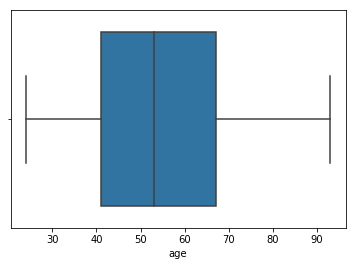

In [24]:
sns.boxplot(elections.age)

## Bi-Variate Analysis

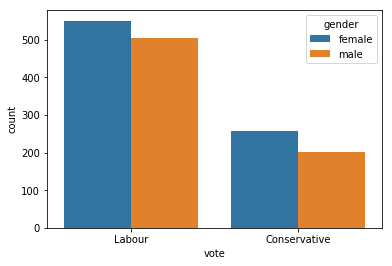

In [25]:
sns.countplot(data=elections, x = 'vote', hue = 'gender')

Gender is not very different for different Vote Categories

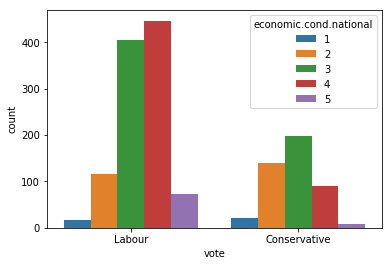

In [26]:
sns.countplot(data=elections, x = 'vote', hue = 'economic.cond.national')

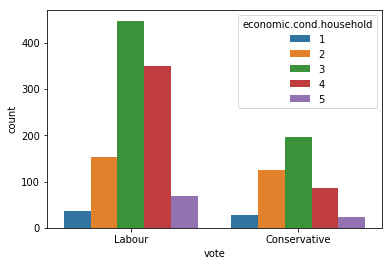

In [27]:
sns.countplot(data=elections, x = 'vote', hue = 'economic.cond.household')

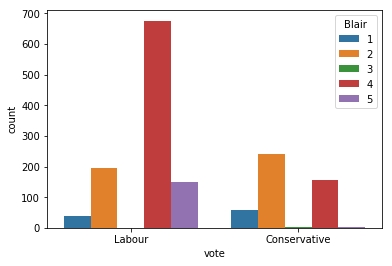

In [28]:
sns.countplot(data=elections, x = 'vote', hue = 'Blair')

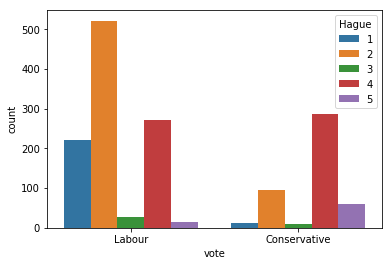

In [29]:
sns.countplot(data=elections, x = 'vote', hue = 'Hague')

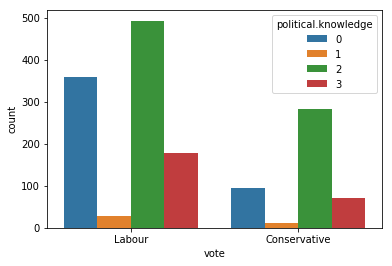

In [30]:
sns.countplot(data=elections, x = 'vote', hue = 'political.knowledge')

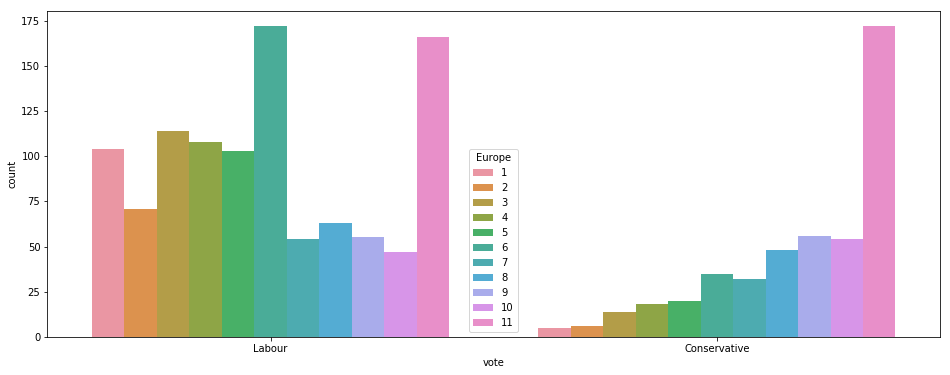

In [31]:
plt.figure(figsize=(16,6))
sns.countplot(data=elections, x = 'vote', hue = 'Europe')


In [32]:
df = elections.copy()


In [33]:
#Target Encoding

cleanup_nums = {"vote":     {"Labour": 0, "Conservative": 1},
                "gender" : {"male":1,"female":0}}

df.replace(cleanup_nums, inplace=True)
df.vote.unique()


array([0, 1], dtype=int64)

In [34]:
df.gender.value_counts(normalize=True)

0    0.53263
1    0.46737
Name: gender, dtype: float64

In [35]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [36]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)

In [38]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
## Performance Matrix on train data set
lr_y_train_predict = lr.predict(X_train)
lr_model_score = lr.score(X_train, y_train)
print(lr_model_score)
print(confusion_matrix(y_train, lr_y_train_predict))
print(classification_report(y_train, lr_y_train_predict))

0.8350612629594723
[[687  67]
 [108 199]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.75      0.65      0.69       307

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [40]:
## Performance Matrix on test data set
lr_y_test_predict = lr.predict(X_test)
lr_test_model_score = lr.score(X_test, y_test)
print(lr_test_model_score)
print(confusion_matrix(y_test, lr_y_test_predict))
print(classification_report(y_test, lr_y_test_predict))

0.8245614035087719
[[266  37]
 [ 43 110]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.72      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.890


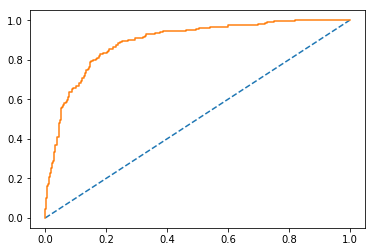

In [100]:
# Train Data
# predict probabilities
probs = lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.879


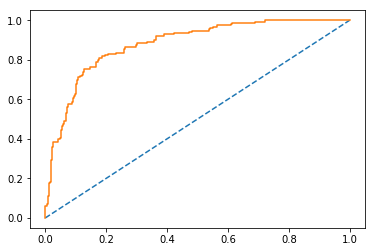

In [77]:
# Test Data
# predict probabilities
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

## LDA Model

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [42]:
## Performance Matrix on train data set
lda_y_train_predict = LDA_model.predict(X_train)
lda_model_score = LDA_model.score(X_train, y_train)
print(lda_model_score)
print(confusion_matrix(y_train, lda_y_train_predict))
print(classification_report(y_train, lda_y_train_predict))

0.8341187558906692
[[685  69]
 [107 200]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [43]:
## Performance Matrix on test data set
lda_y_test_predict = LDA_model.predict(X_test)
lda_test_model_score = LDA_model.score(X_test, y_test)
print(lda_test_model_score)
print(confusion_matrix(y_test, lda_y_test_predict))
print(classification_report(y_test, lda_y_test_predict))

0.8333333333333334
[[269  34]
 [ 42 111]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.889


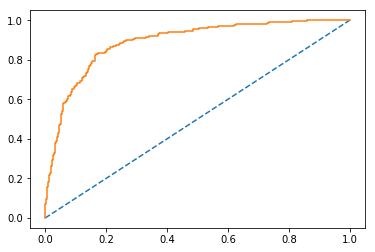

In [99]:
# Train Data
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.888


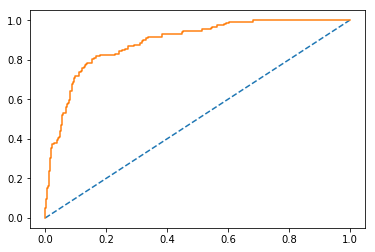

In [83]:
# Test Data
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

## KNN Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
## Performance Matrix on train data set
knn_y_train_predict = KNN_model.predict(X_train)
knn_model_score = KNN_model.score(X_train, y_train)
print(knn_model_score)
print(confusion_matrix(y_train, knn_y_train_predict))
print(classification_report(y_train, knn_y_train_predict))

0.8529688972667295
[[701  53]
 [103 204]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       754
           1       0.79      0.66      0.72       307

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [46]:
## Performance Matrix on test data set
knn_y_test_predict = KNN_model.predict(X_test)
knn_test_model_score = KNN_model.score(X_test, y_test)
print(knn_test_model_score)
print(confusion_matrix(y_test, knn_y_test_predict))
print(classification_report(y_test, knn_y_test_predict))

0.8157894736842105
[[273  30]
 [ 54  99]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       303
           1       0.77      0.65      0.70       153

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC: 0.923


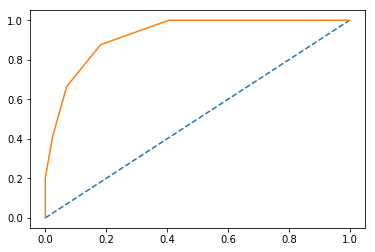

In [98]:
# Train Data
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.852


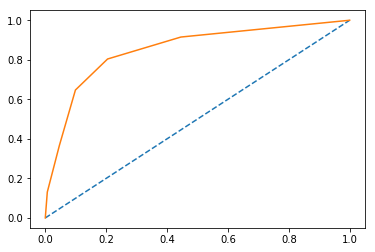

In [82]:
# Test Data
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

## Naive Bayes Model

In [47]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
## Performance Matrix on train data set
nb_y_train_predict = NB_model.predict(X_train)
nb_model_score = NB_model.score(X_train,y_train)
print(nb_model_score)
print(confusion_matrix(y_train,nb_y_train_predict))
print(classification_report(y_train,nb_y_train_predict))

0.8350612629594723
[[675  79]
 [ 96 211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [49]:
## Performance Matrix on test data set
nb_y_test_predict = NB_model.predict(X_test)
nb_test_model_score = NB_model.score(X_test,y_test)
print(nb_test_model_score)
print(confusion_matrix(y_test,nb_y_test_predict))
print(classification_report(y_test,nb_y_test_predict))

0.8223684210526315
[[263  40]
 [ 41 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.888


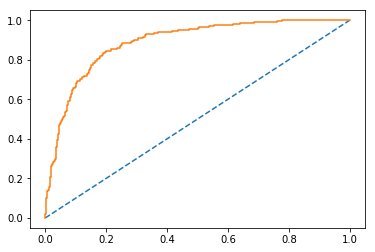

In [97]:
# Train Data
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.876


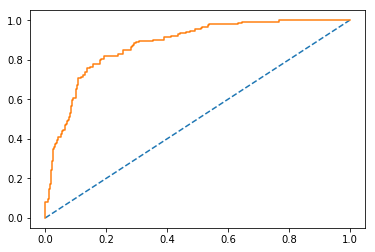

In [81]:
# Test Data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

## SVM

In [101]:
from sklearn import svm

clfSVM = svm.SVC(random_state=1, probability=True)
clfSVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
## Performance Matrix on train data set

svm_y_train_predict = clfSVM.predict(X_train)
svm_model_score = clfSVM.score(X_train,y_train)
print(svm_model_score)
print(confusion_matrix(y_train,svm_y_train_predict))
print(classification_report(y_train,svm_y_train_predict))

0.7323279924599434
[[751   3]
 [281  26]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       754
           1       0.90      0.08      0.15       307

    accuracy                           0.73      1061
   macro avg       0.81      0.54      0.50      1061
weighted avg       0.78      0.73      0.64      1061



In [103]:
## Performance Matrix on test data set
svm_y_test_predict = clfSVM.predict(X_test)
svm_test_model_score = clfSVM.score(X_test,y_test)
print(svm_test_model_score)
print(confusion_matrix(y_test,svm_y_test_predict))
print(classification_report(y_test,svm_y_test_predict))

0.6864035087719298
[[301   2]
 [141  12]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       303
           1       0.86      0.08      0.14       153

    accuracy                           0.69       456
   macro avg       0.77      0.54      0.48       456
weighted avg       0.74      0.69      0.59       456



AUC: 0.878


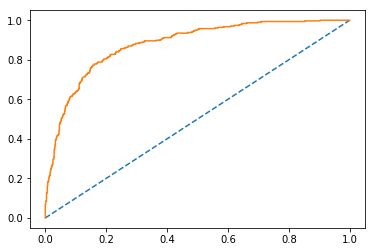

In [105]:
# Train Data
# predict probabilities
probs = clfSVM.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.886


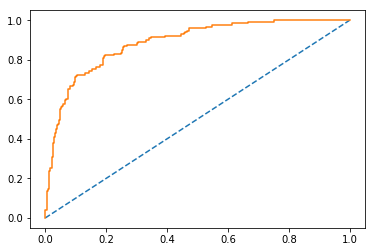

In [104]:
# Test Data
# predict probabilities
probs = clfSVM.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_test_auc)
# calculate roc curve
svm_test_fpr, svm_test_tpr, svm_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_test_fpr, svm_test_tpr)

## Bagging

## Random Forest

In [53]:

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100, random_state =1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [54]:
## Performance Matrix on train data set
rf_y_train_predict = RF_model.predict(X_train)
rf_model_score =RF_model.score(X_train, y_train)
print(rf_model_score)
print(confusion_matrix(y_train, rf_y_train_predict))
print(classification_report(y_train, rf_y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [55]:
## Performance Matrix on test data set
rf_y_test_predict = RF_model.predict(X_test)
rf_test_model_score = RF_model.score(X_test, y_test)
print(rf_test_model_score)
print(confusion_matrix(y_test, rf_y_test_predict))
print(classification_report(y_test, rf_y_test_predict))

0.8289473684210527
[[276  27]
 [ 51 102]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.79      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



In [56]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, RF_model.feature_importances_[idx]))

The coefficient for age is 0.21277676406489618
The coefficient for economic.cond.national is 0.09238679093255381
The coefficient for economic.cond.household is 0.08146971211338108
The coefficient for Blair is 0.1331160352125232
The coefficient for Hague is 0.17867737481658186
The coefficient for Europe is 0.18802112820055483
The coefficient for political.knowledge is 0.07785232649473615
The coefficient for gender is 0.03569986816477286


In [57]:
#Checking Co-efficients of LDA Model
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LDA_model.coef_[0][idx]))

The coefficient for age is 0.020037048856610378
The coefficient for economic.cond.national is -0.6049204499917713
The coefficient for economic.cond.household is -0.050069046956978766
The coefficient for Blair is -0.7424003897819802
The coefficient for Hague is 0.9266343785776768
The coefficient for Europe is 0.22361192469849644
The coefficient for political.knowledge is 0.430334842433205
The coefficient for gender is -0.14907997566596093


## Model Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8], #7,9,10,11
    'max_features': [5], #4,6
    'min_samples_leaf': [8],#9,10
    'min_samples_split': [20],#25,50
    'n_estimators': [100,150] #100,200
}

rfcl = RandomForestClassifier(random_state =1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [60]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 150}

In [61]:
rf_best_grid = grid_search.best_estimator_

In [62]:
## Performance Matrix on train data set
rfcl_y_train_predict = rf_best_grid.predict(X_train)
rfcl_model_score =rf_best_grid.score(X_train, y_train)
print(rfcl_model_score)
print(confusion_matrix(y_train, rfcl_y_train_predict))
print(classification_report(y_train, rfcl_y_train_predict))

0.8680490103675778
[[703  51]
 [ 89 218]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       754
           1       0.81      0.71      0.76       307

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.87      0.87      0.87      1061



In [63]:
## Performance Matrix on test data set
rfcl_y_test_predict = rf_best_grid.predict(X_test)
rfcl_test_model_score = rf_best_grid.score(X_test, y_test)
print(rfcl_test_model_score)
print(confusion_matrix(y_test, rfcl_y_test_predict))
print(classification_report(y_test, rfcl_y_test_predict))

0.8245614035087719
[[274  29]
 [ 51 102]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       303
           1       0.78      0.67      0.72       153

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.935


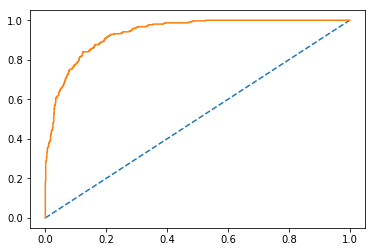

In [96]:
# Train Data
# predict probabilities
probs = rf_best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.895


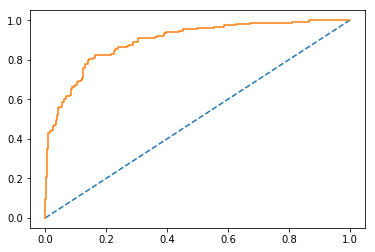

In [85]:
# Test Data
# predict probabilities
probs = rf_best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

## Boosting

In [64]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(random_state =1, learning_rate = 0.01)
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [65]:
## Performance Matrix on train data set
xgb_y_train_predict = XGB_model.predict(X_train)
xgb_model_score = XGB_model.score(X_train, y_train)
print(xgb_model_score)
print(confusion_matrix(y_train, xgb_y_train_predict))
print(classification_report(y_train, xgb_y_train_predict))

0.8878416588124411
[[703  51]
 [ 68 239]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       754
           1       0.82      0.78      0.80       307

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.89      0.89      0.89      1061



In [66]:
## Performance Matrix on test data set
xgb_y_test_predict = XGB_model.predict(X_test)
xgb_test_model_score = XGB_model.score(X_test, y_test)
print(xgb_test_model_score)
print(confusion_matrix(y_test, xgb_y_test_predict))
print(classification_report(y_test, xgb_y_test_predict))

0.8267543859649122
[[270  33]
 [ 46 107]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       303
           1       0.76      0.70      0.73       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.82       456



In [67]:
rf_best_grid.feature_importances_

array([0.08460721, 0.08256874, 0.02721767, 0.22876767, 0.30160778,
       0.19057229, 0.07226057, 0.01239807])

AUC: 0.940


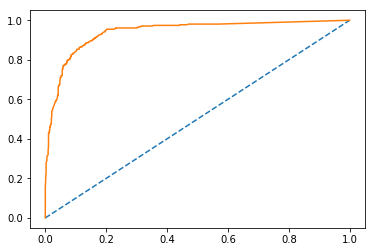

In [95]:
# Train Data
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.873


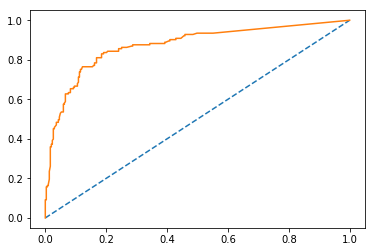

In [86]:
# Test Data
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
xgb_test_fpr, xgb_test_tpr, xgb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr)

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [72]:
## Performance Matrix on train data set
ada_y_train_predict = ADB_model.predict(X_train)
ada_model_score = ADB_model.score(X_train, y_train)
print(ada_model_score)
print(confusion_matrix(y_train, ada_y_train_predict))
print(classification_report(y_train, ada_y_train_predict))

0.8501413760603205
[[688  66]
 [ 93 214]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.76      0.70      0.73       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [74]:
## Performance Matrix on test data set
ada_y_test_predict = ADB_model.predict(X_test)
ada_model_score = ADB_model.score(X_test, y_test)
print(ada_model_score)
print(confusion_matrix(y_test, ada_y_test_predict))
print(classification_report(y_test, ada_y_test_predict))

0.8135964912280702
[[268  35]
 [ 50 103]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.915


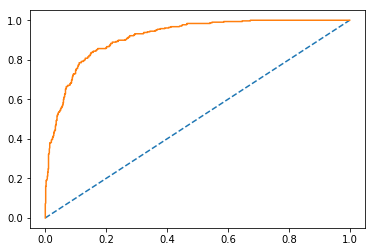

In [94]:
# Train Data
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

AUC: 0.877


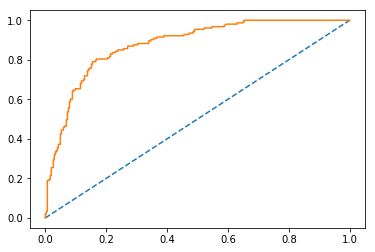

In [87]:
# Test Data
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ada_test_auc)
# calculate roc curve
ada_test_fpr, ada_test_tpr, ada_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_test_fpr, ada_test_tpr)

In [68]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, rf_best_grid.feature_importances_[idx]))

The coefficient for age is 0.08460721480973193
The coefficient for economic.cond.national is 0.0825687380052629
The coefficient for economic.cond.household is 0.027217669429813036
The coefficient for Blair is 0.22876766713290483
The coefficient for Hague is 0.30160778493123114
The coefficient for Europe is 0.19057228691438458
The coefficient for political.knowledge is 0.07226057024354711
The coefficient for gender is 0.012398068533124484


In [69]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LDA_model.coef_[0][idx]))

The coefficient for age is 0.020037048856610378
The coefficient for economic.cond.national is -0.6049204499917713
The coefficient for economic.cond.household is -0.050069046956978766
The coefficient for Blair is -0.7424003897819802
The coefficient for Hague is 0.9266343785776768
The coefficient for Europe is 0.22361192469849644
The coefficient for political.knowledge is 0.430334842433205
The coefficient for gender is -0.14907997566596093


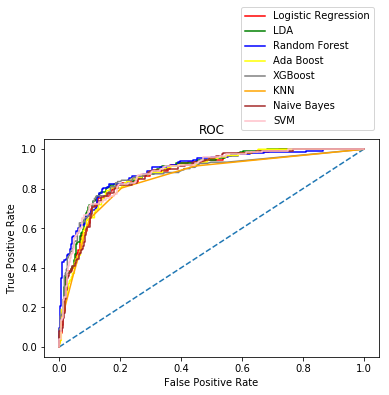

In [108]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(rf_test_fpr,rf_test_tpr,color='blue',label="Random Forest")
plt.plot(ada_test_fpr,ada_test_tpr,color='yellow',label="Ada Boost")
plt.plot(xgb_test_fpr,xgb_test_tpr,color='grey',label="XGBoost")
plt.plot(knn_test_fpr,knn_test_tpr,color='orange',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='brown',label="Naive Bayes")
plt.plot(svm_test_fpr,svm_test_tpr,color='pink',label="SVM")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LDA_model, X_train, y_train, cv=10)
scores

array([0.79439252, 0.77358491, 0.83962264, 0.85849057, 0.85849057,
       0.8490566 , 0.80188679, 0.8490566 , 0.81132075, 0.82075472])

In [118]:
scores = cross_val_score(NB_model, X_train, y_train, cv=10)
scores

array([0.80373832, 0.78301887, 0.8490566 , 0.83962264, 0.90566038,
       0.8490566 , 0.78301887, 0.83962264, 0.81132075, 0.82075472])

In [119]:
scores = cross_val_score(rf_best_grid, X_train, y_train, cv=10)
scores

array([0.8411215 , 0.82075472, 0.83962264, 0.83962264, 0.90566038,
       0.83962264, 0.81132075, 0.86792453, 0.80188679, 0.82075472])

In [112]:
scores = cross_val_score(ADB_model, X_train, y_train, cv=10)
scores

array([0.80373832, 0.79245283, 0.83018868, 0.85849057, 0.89622642,
       0.81132075, 0.78301887, 0.83018868, 0.78301887, 0.8490566 ])

In [115]:
scores = cross_val_score(XGB_model, X_train, y_train, cv=10)
scores

array([0.8411215 , 0.82075472, 0.8490566 , 0.83962264, 0.86792453,
       0.83962264, 0.85849057, 0.81132075, 0.75471698, 0.78301887])

In [117]:
scores = cross_val_score(KNN_model, X_train, y_train, cv=10)
scores

array([0.80373832, 0.78301887, 0.76415094, 0.80188679, 0.82075472,
       0.81132075, 0.79245283, 0.82075472, 0.77358491, 0.77358491])